In [3]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [5]:
smis = mf.smif2smis('./con2-150000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidfu = mf.smis2smidf(smis)
len(smis)

9629

In [8]:
import chemfp
from chemfp import search
import pandas as pd
import time
import sys
import subprocess as sp
from rdkit import Chem
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import pylab
import random
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold as ms
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [15]:
def framecheck(s):
    try:
        return Chem.MolToSmiles(ms.GetScaffoldForMol(Chem.MolFromSmiles(s)))
    except:
        pass

fras = list(set([framecheck(s) for s in smidfu.smiles]))

['',
 'O=C1c2ccccc2OC1C1CCCCC1',
 'C1CCC(C2CCCNC2)C1',
 'C1=C(c2ccccc2)C(c2ccccc2)CNC1',
 'O=C(NCCOc1ccccc1)c1cc[nH]n1',
 'O=C(NC1CCS(=O)(=O)C1)c1cccs1',
 'O=C(C1CC1)N1CCCC1C1CCCC1',
 'c1cnc(NCc2cn[nH]c2)cn1',
 'O=C(C1CC1)N1CCC(Nc2ccncn2)CC1',
 'O=C(Nc1ccon1)N1CCNCC1',
 'O=C(Cc1cnc[nH]1)N1CCc2ccccc2C1',
 'O=C(c1cc[nH]c1)N1CCCCC1',
 'c1ccn2cc(C3CC3)nc2c1',
 'c1ccc2oc(N3CCCCC3)nc2c1',
 'O=C(NCc1ccncc1)Nc1ccccc1',
 'c1ccc2c(c1)CCC2',
 'c1ccnnc1',
 'O=C(CNCc1ccco1)c1ccccc1',
 'O=C(C1CCC1)N1CCNCC1',
 'O=c1c2ccccc2ccn1CCC1CCCN1',
 'c1ccc(-c2ncon2)cc1',
 'O=C(COc1ccccc1)NCc1ccccc1',
 'O=C1CC(c2ccncc2)C(=O)c2ccccc21',
 'O=C(NCC1CCCN1)C1CCCN(C2CC2)C1',
 'O=C(COc1ccccc1)NCc1ccco1',
 'c1cc(C2CCCNC2)ccn1',
 'O=C1NCCCCC1NC(=O)N1CCCCC1',
 'c1ncon1',
 'c1ccc(CCNc2ncccn2)nc1',
 'O=C(Nc1nncs1)c1ccncn1',
 'c1cc(B2OCCO2)ccn1',
 'c1ccc(CNc2ccncn2)cc1',
 'O=C1NC2CCC1N(C(=O)OCc1ccccc1)C2',
 'O=c1[nH]cccc1-c1ccccc1',
 'c1ccc(-n2ncc3c4ccccc4[nH]c32)cc1',
 'O=C(c1ccsc1)N1CCCCC1',
 'O=C(COCC1CCCO1)Nc1ccccc1',
 

In [49]:
it = range(50000, 300001, 50000)
mwts = []

for n in it:
    smis = mf.smif2smis('./con' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

In [50]:
map(np.std, mwts)

[10.093759639389301,
 9.707267379714004,
 9.84247396379655,
 9.579228671505163,
 9.769731563485228,
 10.542549283564279]

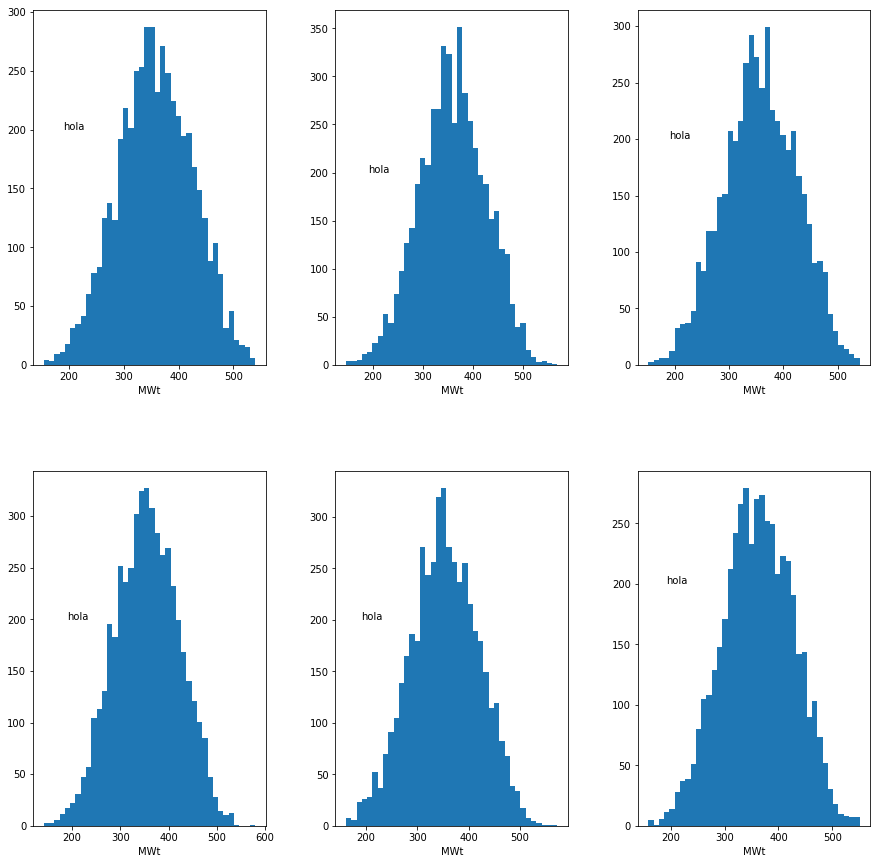

In [37]:
nrow = 2
ncol = 3


In [64]:
def paintmultihist(prs, xlab, nrow, ncol, xtxt, ytxt, sizex, sizey, legx, legy, leg):
    
    mes = map(np.mean, prs)
    sds = map(np.std, prs)
    fig, ax = plt.subplots(nrow, ncol, figsize=[sizex, sizey])
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    ni = 0

    for row in range(nrow):
        for col in range(ncol):
            if ni < len(mwts):
                ax[row][col].hist(mwts[ni], bins = 40)
                ax[row][col].set_xlabel("MWt")
                ax[row][col].text(xtxt,ytxt, "Mean=" + str(round(mes[ni],2)))
                ax[row][col].text(xtxt,ytxt-40, "SD=" + str(round(sds[ni],2)))
                ax[row][col].text(legx, legy, leg[ni])
                ni = ni+1

    plt.show()

In [65]:
leg = ["# train=50K","# train=100K","# train=150K","# train=200K","# train=250K","# train=300K"]

In [45]:
map(np.mean, mwts)

[357.51790315962256,
 359.14475810728135,
 357.5035638766521,
 354.782404003268,
 352.89524822101305,
 361.4266814533166]

In [46]:
map(np.std, mwts)

[67.54511421694303,
 66.20676307964177,
 67.21508792230864,
 66.43672542783021,
 66.30778287687824,
 65.88615936246117]

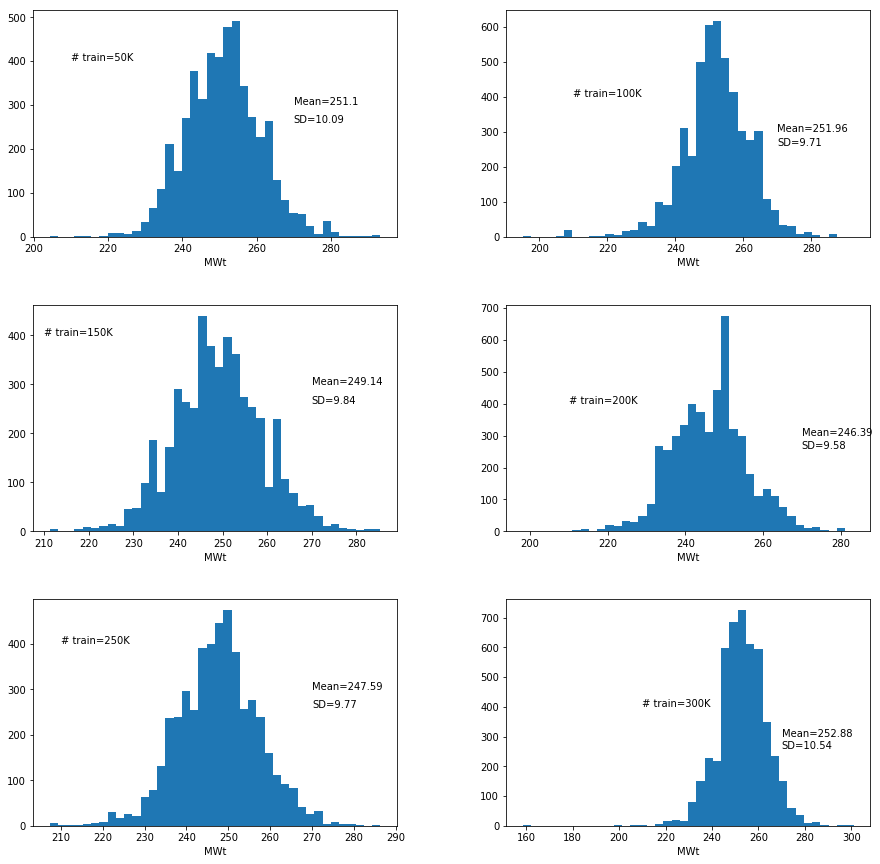

In [66]:
paintmultihist(mwts, "MWt", 3, 2, 270, 300, 15, 15, 210, 400, leg)

In [68]:
cls = [[2,3,5,9,10],[5,6,7,17],[12,11,10],[13,14],[15]]

TypeError: 'AxesSubplot' object does not support indexing

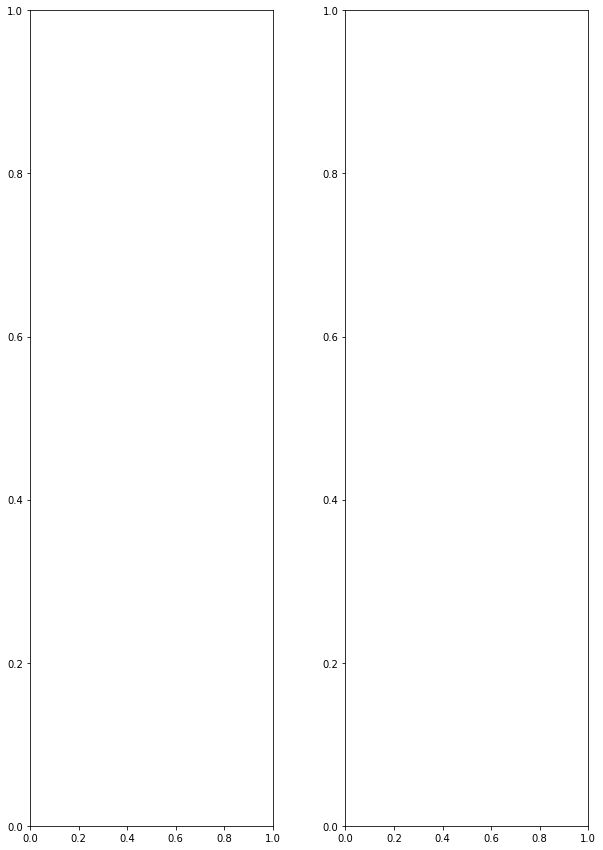

In [79]:
mf.plotmulticlus([cls],10,15)

In [70]:
def plotmulticlus(cls, sizex, sizey):
    
    ncl = len(cls)
    
    fig, ax = plt.subplots(ncl, 2, figsize=[sizex, sizey], squeeze = False)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    ni = 0
    for i in range(ncl):
        cl = cls[i]
            
        # Left column: cluster distribution
        a0 = ax[i][0]
        d = pd.DataFrame({'clid':range(1, len(cl)+1), 'n':map(len, cl)})
        a0.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)
        a0.set_xlabel("Cluster ID")
        a0.set_ylabel("# Elements")
        ia0 = inset_axes(a0, width=1.3, height=0.9)
        ia0.set_xscale("log")
        ia0.set_yscale("log")
        ia0.set_xlabel("log Cluster ID")
        ia0.set_ylabel("log #Elements")
        ia0.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)
            
        # Right column: neighbor distribution
        a1 = ax[i][1]
        d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
        a1.scatter(d2.iloc[:,0], d2.iloc[:,1], marker = '.', linewidth = 0)
        a1.set_xlabel("Cluster Size")
        a1.set_ylabel("# Elements")
        ia1 = inset_axes(a1, width=1.3, height=0.9)
        ia1.set_xscale("log")
        ia1.set_yscale("log")
        ia1.set_xlabel("log Cluster Size")
        ia1.set_ylabel("log # Elements")
        ia1.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)
    return
    

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


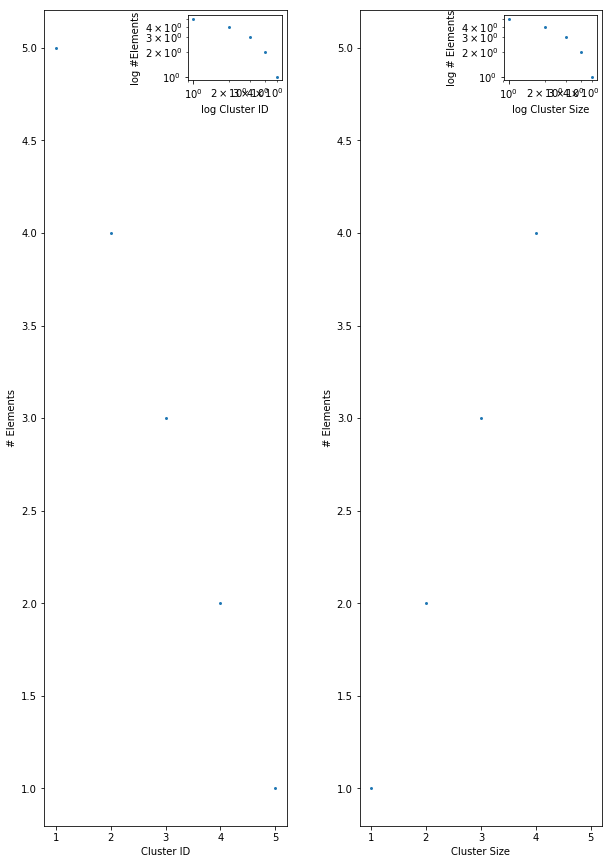

In [81]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
plotmulticlus([cls],10,15)

TypeError: object of type 'int' has no len()

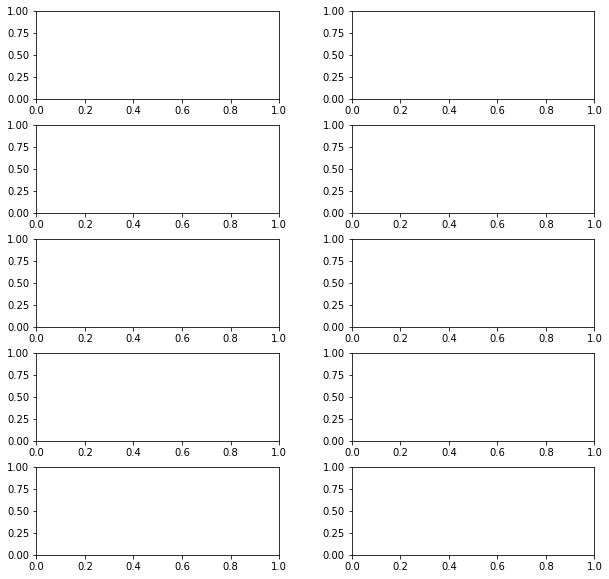

In [76]:
sizex = 10
sizey = 10
ncl = len(cls)
    
fig, ax = plt.subplots(ncl, 2, figsize=[sizex, sizey], squeeze = False)
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

ni = 0
for i in range(ncl):
        cl = cls[i]
            
        # Left column: cluster distribution
        a0 = ax[i][0]
        d = pd.DataFrame({'clid':range(1, len(cl)+1), 'n':map(len, cl)})
        a0.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)
        a0.set_xlabel("Cluster ID")
        a0.set_ylabel("# Elements")
        ia0 = inset_axes(a0, width=1.3, height=0.9)
        ia0.set_xscale("log")
        ia0.set_yscale("log")
        ia0.set_xlabel("log Cluster ID")
        ia0.set_ylabel("log #Elements")
        ia0.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)
            
        # Right column: neighbor distribution
        a1 = ax[i][1]
        d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
        a1.scatter(d2.iloc[:,0], d2.iloc[:,1], marker = '.', linewidth = 0)
        a1.set_xlabel("Cluster Size")
        a1.set_ylabel("# Elements")
        ia1 = inset_axes(a1, width=1.3, height=0.9)
        ia1.set_xscale("log")
        ia1.set_yscale("log")
        ia1.set_xlabel("log Cluster Size")
        ia1.set_ylabel("log # Elements")
        ia1.scatter(d.iloc[:,0], d.iloc[:,1], marker = '.', linewidth = 0)

In [77]:
cl

[2, 3, 5, 9, 10]

In [78]:
len(cl)

5